In [ ]:
pip install -U pylibjpeg-openjpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.9 MB/s eta 0:00:00


## __Lib Open JPEG: compress options__

params | description
-- | --
-n | number of resolutions (def: 6)
-b | code block size  (def: 64x64)
.c | precinct size, Values specified must be power of 2.
-t | Tile size
-p | Progression order. (def: LRCP) values: LRCP|RLCP|RPCL|PCRL|CPRL


(3701, 2717, 3) uint8


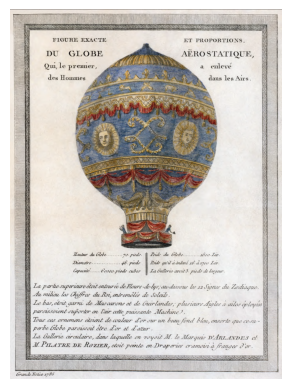

In [ ]:
from openjpeg import decode
import matplotlib.pyplot as plt


name = 'asiandragon'
name = 'sample1.jp2'
arr = decode(name,)
print(arr.shape, arr.dtype)
plt.imshow(arr); plt.axis('off');
plt.show()

> - __Precinct__ is defined as a group of code-blocks from all of the subbands at a specific resolution, such that the group nominally corresponds to the same spatial region in the original image. Precincts represent a coarser partition of the wavelet coefficients than code-blocks, and they provide an efficient way to access spatial regions of an image.
- A packet starts with a packet header. The packet header contains information regarding the number of coding passes for each code-block in the packet.
    - It also contains the length of the compressed data for each code-block.
    - The first bit of a packet header indicates whether the packet contains data or is empty.
    - If the packet is nonempty, code-block inclusion information is signaled for each code-block in the packet.
    - This information indicates whether any compressed data from a code-block is included in the packet.
    - If compressed code-block data has already been included in a previous packet, a single bit is used to signal this information.
    - Otherwise, it is signaled with a separate tag tree for each subband of the corresponding precinct.
    - The tag tree is a hierarchical data structure that is capable of exploiting spatial redundancy.
    - If code-block data are being included for the first time, the number of most significant bit-planes that are entirely zero is also signaled with another set of tag trees for the precinct.
    - After this, the number of coding passes for the code-block and the length of the corresponding compressed data are signaled.



In [ ]:
SOC = 79; SOT = 144; SOD = 147; EOC = 217; SIZ = 81; COD = 82; COC = 83; QCD = 92; QCC = 93; RGN = 94;
POC = 95; TLM = 85; PLM = 87; PLT = 88; PPM = 96; PPT = 97; SOP = 145; EPH = 146; CRG = 99; COM = 100;
progression = {0:'LRCP', 1:'RLCP', 2:'RPCL', 3:'PCRL', 4:'CPRL'}

In [ ]:
import pandas as pd
import numpy as np

#name = input('Ingrese el nombre de un archivo jp2: ')
#name = 'sample1.jp2'
imgfile = open(name, 'rb')
code = imgfile.read()
imgfile.close()
print('byte stream size:', len(code))

data = {
    'mark': ['SOC', 'SOT', 'SOD', 'EOC', 'SIZ', 'COD', 'COC', 'QCD', 'QCC', 'RGN', 'POC', 'TLM', 'PLM', 'PLT', 'PPM', 'PPT', 'SOP', 'EPH', 'CRG', 'COM'],
    'hex': ['4F', '90', '93', 'D9', '51', '52', '53', '5C', '5D', '5E', '5F', '55', '57', '58', '60', '61', '91', '92', '63', '64'],
    'dec': [79, 144, 147, 217, 81, 82, 83, 92, 93, 94, 95, 85, 87, 88, 96, 97, 145, 146, 99, 100],
    'descripción': ['Inicio de Codestream', 'Inicio de tile', 'Inicio de codificación de datos', 'Final del codestream', 'Tamaño de la imagen', 'Parámetros de codificación', 'Parámetros de codificación componente', 'Cuantización por defecto', 'Cuantización de componente', 'Región de interés', 'Cambio de orden de progresión', 'Tabla de longitud de paquetes', 'longitud de paquete en main header', 'longitud de paquete en tile', 'encabezado de paquete en main header', 'encabezado de paquete en tile', 'Inicio de paquete', 'final de codigo de paquete', 'Registro de componente', 'Comentario'],
    'tipo': ['delimitador', 'delimitador', 'delimitador', 'delimitador', 'información', 'información', 'información', 'información', 'información', 'delimitador', 'delimitador', 'apuntador', 'información', 'información', 'información', 'información', 'delimitador', 'delimitador', 'delimitador', 'información']
}
dfm = pd.DataFrame(data)

vals = dfm.dec.to_numpy(dtype='uint8')
cnts = {np.uint8(v):0 for v in vals}
for i in range(len(code)):
    if code[i] == 0xFF:
        if code[i+1] in vals:
            cnts[code[i+1]] += 1
dfm['cuenta'] = cnts.values()
dfm.sort_values('dec')

byte stream size: 670265


,mark,hex,dec,descripción,tipo,cuenta
0,SOC,4F,79,Inicio de Codestream,delimitador,16
4,SIZ,51,81,Tamaño de la imagen,información,20
5,COD,52,82,Parámetros de codificación,información,18
6,COC,53,83,Parámetros de codificación componente,información,21
11,TLM,55,85,Tabla de longitud de paquetes,apuntador,23
12,PLM,57,87,longitud de paquete en main header,información,17
13,PLT,58,88,longitud de paquete en tile,información,19
7,QCD,5C,92,Cuantización por defecto,información,21
8,QCC,5D,93,Cuantización de componente,información,15
9,RGN,5E,94,Región de interés,delimitador,15


In [ ]:
#name = input('Ingrese el nombre de un archivo jp2: ')
imgfile = open(name, 'rb')
code = imgfile.read()
imgfile.close()

cnts = np.zeros(256, dtype='uint32')
for i in range(len(code)):
    if code[i] == 0xFF:
        cnts[code[i+1]] += 1
hx = [hex(x) for x in range(16)]
dfc = pd.DataFrame(cnts.reshape(16,16), columns=hx, index=hx)
print('Full byte stream size:    ', len(code), '\nNumber of markers in file:', sum(cnts))
dfc

Full byte stream size:     670265 
Number of markers in file: 13314


,0x0,0x1,0x2,0x3,0x4,0x5,0x6,0x7,0x8,0x9,0xa,0xb,0xc,0xd,0xe,0xf
0x0,30,11,25,26,27,24,13,21,14,13,23,19,24,18,20,13
0x1,8,18,17,14,22,26,17,12,19,29,19,24,25,17,18,19
0x2,13,19,16,19,19,18,16,20,20,16,15,20,16,25,18,14
0x3,20,12,17,13,23,20,21,21,20,16,20,17,19,16,19,15
0x4,14,22,13,21,26,20,15,16,19,19,15,21,18,19,22,16
0x5,16,20,18,21,19,23,18,17,19,23,28,15,21,15,15,24
0x6,15,27,18,25,20,24,21,17,23,12,22,22,29,21,26,22
0x7,14,24,23,26,18,17,21,14,14,17,23,18,34,20,19,36
0x8,20,16,13,13,16,7,5,4,5,4,3,2,0,0,1,0
0x9,12,5346,5346,12,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# print mark position
mark = SOT
cnt = 0
for i in range(len(code)):
    if code[i] == 0xFF and code[i+1] == mark:
        cnt += 1
        #print('%3d'%cnt, i)
        print(i, end=', ')


3056, 70217, 169281, 205411, 261459, 401481, 425489, 472180, 534851, 561157, 606771, 645199, 

> - `SOC:  79` Marca de inicio (2B) una vez,
- `SIZ:  81` Segmento de información de la imagen, tamaño dado del segmento, una vez
- `SOT: 144` Marca de inicio de Tile, (12B), incluye tamaño del segmento
- `SOD: 147` Marca de inicio de los datos en el Tile, (2B) uno por cada Tile
- `EOC: 219` Marca de fin de la codificación (2B) una vez
- `COD:  82` segmento del estilo de codificación, tamaño dadp del segmento, una vez
- `QCD:  92` segmento de cuantización por omisión, tamaño dado del segmento, una vez

---

> - The main header begins with SOC followed SIZ marker
- The Tile header begins with SOT and SOD marker must be present after each tile-part header
- The SIZ marker segment contains information regarding the image and tile sizes, and their positioning with respect to the reference grid, as well as component subsampling factors and bit-depths
- The COD marker segment contains information related to coding parameters such as precinct and code-block sizes, entropy-coding mode, number of layers, progression order, etc.
- The COC marker segment contains the same type of information as the COD marker, but it applies to a specific component.
- The QCD and QCC marker segments contain quantizer step size information
for all components and for a specific component, respectively.
- The SOP marker segment may appear before each packet and the EPH marker may appear immediately after a packet header.
- Markers that can be presnt in the main header are: SOC, SIZ, COD, QCD, QCC, COC, RGN, POC, PPM, TLM, PLM, CRG, and COM. The first four are required.
- Each tile-part header may optionally contain POC, PPT, PLT, or COM
marker segments
- If the tile-part header is the first for a given tile, it can optionally contain COD, COC, QCD, QCC, or RGN


In [ ]:
def printCodeMark(code, mark, sz=40):
    cnt = 0
    for i in range(len(code)):
        if code[i] == 0xFF and code[i+1] == mark:
            cnt += 1
            print("{:<3} {:<8}".format(cnt, i), end=' ')
            for k in range(sz):
                #print('%3d'%code[i+k], end=' ')
                print(format(code[i+k], '02X'), end=' ')
            print()
printCodeMark(code, SIZ, 56)

1   2931     FF 51 00 2F 00 00 00 00 0A 9D 00 00 0E 75 00 00 00 00 00 00 00 00 00 00 04 00 00 00 04 00 00 00 00 00 00 00 00 00 00 03 07 01 01 07 01 01 07 01 01 FF 52 00 12 07 02 00 
2   39466    FF 51 4E CB 07 D3 2A 10 26 D6 CB 84 2C DD 6C D9 34 03 16 19 88 16 AD 14 2D 86 2A FE EB 5B D5 D8 62 A4 20 60 FF 3D 53 65 29 19 E4 A2 B0 CD A9 A2 C6 FB 98 21 A9 74 2B B6 
3   43250    FF 51 D8 0D 21 7F FF 0A 98 32 15 D5 D3 D8 FE 35 3B F8 04 9D A1 7C 10 77 1A A2 FD 4A A6 15 86 46 C4 02 60 16 F6 22 17 47 1A E9 7E 93 7C D2 33 83 34 C6 5D 97 44 B4 F1 43 
4   72147    FF 51 3E 89 EF B6 09 57 63 03 C5 C6 8B FF 91 00 04 00 12 C7 C3 5D 0F 74 CC 32 40 FF 92 CB 70 CF 34 07 2B 92 C4 8B CA 00 2C 3B 91 AE DD 5D CF 13 42 CE A1 CA E5 6E 49 1B 
5   72663    FF 51 4E 53 B7 67 DD E9 BD D9 3A 6F 2D 31 FD 15 25 01 3F BF 9C D9 F5 60 8B 06 71 13 C5 B0 55 8C F2 60 BD 56 FD 23 C5 AB 91 FF 46 F8 33 34 3D DD 1D E4 DF C3 F5 0C 59 93 
6   129319   FF 51 97 3B FB EA 69 46 6A 3C F3 DF BF 33 84 6E 27 20 5D 3D 78 0F 4E 89 5B AB

In [ ]:
def printCodeInterval(code, ini, sz=150):
    for i in range(sz):
        print('%3d'%code[i+ini], end=' ')
        if i%40==39: print()
    if sz<40: print()
print('SOT')
#for i in [3056, 70217, 169281, 205411, 261459, 401481, 425489, 472180, 534851, 561157, 606771, 645199]:
for i in [0, 152]:
    printCodeInterval(code, i)

SOT
255  79 255  81   0  47   0   0   0   0   8   0   0   0   8   0   0   0   0   0   0   0   0   0   0   0   8   0   0   0   8   0   0   0   0   0   0   0   0   0 
  0   3   7   1   1   7   1   1   7   1   1 255  82   0  16   7   0   0  15   1   3   4   4   0   1 102 102 102 102 255  92   0  13  64  64  72  72  80  72  72 
 80  72  72  80 255  93   0  14   1  64  72  80  80  88  80  80  88  80  80  88 255  93   0  14   2  64  72  80  80  88  80  80  88  80  80  88 255 100   0  34 
  0   1  67 114 101  97 116 101 100  32  98 121  58  32  74  74  50  48  48  48  32 118 101 114 115 105 111 110  32  53 255 144   0  10   0   0   0  38   5 186   0   1 255  93   0  14   1  64  72  80  80  88  80  80  88  80  80  88 255  93   0  14   2  64  72  80  80  88  80  80 
 88  80  80  88 255 147 255 145   0   4   0   0 207 138 212 255 146  17  80  84 175 255 127 190 131  36 169 184 129 167  17   7 220 208 138  68   0  11   4  35 
 72 149 224  84   6  17 165  34  73  56  19 251  42 104 197 163  21 144

In [ ]:
for i in range(len(code)):
    if code[i] == 0xFF:
        if code[i+1] in vals:
            if   code[i+1] == 144: print('\n%7d\t'%i, end='') # SOT
            elif code[i+1] == 145: print('.',end='')  # SOP
            elif code[i+1] == 146: print('', end='')  # EPH
            elif code[i+1] == 79:  print('I',end='')  # SOC
            elif code[i+1] == 147: print('D',end='')  # SOD
            elif code[i+1] == 81:  print('Z',end='')  # SIZ
            elif code[i+1] == 82:  print('C',end='')  # COD
            elif code[i+1] == 92:  print('Q',end='')  # QCD
            elif code[i+1] == 93:  print('Q',end='')  # QCC
            elif code[i+1] == 87:  print('L',end='')  # PLM
            elif code[i+1] == 88:  print('L',end='')  # PLT
            elif code[i+1] == 95:  print('P',end='')  # POC
            elif code[i+1] == 83:  print('O',end='')  # COC
            elif code[i+1] == 85:  print('T',end='')  # TLM
            elif code[i+1] == 87:  print('L',end='')  # PLM
            elif code[i+1] == 94:  print('R',end='')  # RGN
            elif code[i+1] == 96:  print('K',end='')  # PPM
            elif code[i+1] == 97:  print('K',end='')  # PPT
            elif code[i+1] == 100: print('K',end='')  # COM
            #else: print(dfm[dfm.dec==code[i+1]]['mark'].values[0], end=' ')
        #else: print('X', end='')

IZCQQQK
    152	QQD....C.IK....L.C.I.KT.O...O..........LO...........K.....................................................................L.............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

## Get Image Information

> - mark: first SIZ
- get image size
- get tile size
- get image offset
- get number of components
- get number of tiles

Mark: SIZ | 4    | xs   | ys   | 8    | xt   | yt   | 8    | xoff | yoff | ncomp |
:--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--:  |
bytes -2- | -4-  | -4-  | -4-  | -8-  | -4-  | -4-  | -8-  | -4-  | -4-  | -2-   |


In [ ]:
# analisis de la marca de inicio
# SIZ: tamaño imagen, tamño tile, offset, componentes
def bytes_to_int4(a, b, c, d):
    return a*2**24 + b*2**16 + c*2**8 + d

def bytes_to_int2(a, b):
    return a*2**8 + b

def getImageInfo(code):
    for j in range(len(code)):
        if code[j] == 0xFF and code[j+1] == SIZ:
            i = j+6
            xs = bytes_to_int4(*code[i:i+4])
            ys = bytes_to_int4(*code[i+4:i+8])
            i+=16
            xt = bytes_to_int4(*code[i:i+4])
            yt = bytes_to_int4(*code[i+4:i+8])
            i+=8
            xt0 = bytes_to_int4(*code[i:i+4])
            yt0 = bytes_to_int4(*code[i+4:i+8])
            ncomp = bytes_to_int2(code[i+8], code[i+9])
            i+=10
            ntiles = ((xs - xt0 + xt - 1) // xt) * ((ys - yt0 + yt - 1) // yt)
            return xs, ys, xt, yt, xt0, yt0, ncomp, ntiles

xs, ys, xt, yt, xo, yo, nc, nt = getImageInfo(code)
print('Image Size:  ', xs, ys)
print('Tile Size:   ', xt, yt)
print('Offset image:', xo, yo)
print('Components:  ', nc)
print('Num of Tiles:', nt)

Image Size:   2048 2048
Tile Size:    2048 2048
Offset image: 0 0
Components:   3
Num of Tiles: 1


In [ ]:
printCodeInterval(code, 2980, 40)  # desde la marca de COD:82

255  82   0  18   7   2   0   6   1   5   4   4  32   0 119 119 119 119 136 136 255  92   0  35  66 111  24 110 234 110 234 110 188 103   0 103   0 102 226  95 


In [ ]:
printCodeInterval(code, len(code)-40)

255 146 255 145   0   4   1 100   0 255 146 255 145   0   4   1 101   0 255 146 255 145   0   4   1 102   0 255 146 255 145   0   4   1 103   0 255 146 255 217 


## Get structure of Image

> - mark: first COD
- get progression order
- get number of quality layers
- get number of resolution levels
- get resolution structure organization
    - get resolution size
    - get precints size
    - get number of precints for tile

Mark: COD  | 3    | prog | layers | 1    | resol | 4    | np*resol+1 |
      :--: | :--: | :--: | :--:   | :--: | :--:  | :--: | :--: |
bytes: -2- | -3-  | -1-  | -2-    | -1-  | -1-   | -4-  | -n-  |


In [ ]:
def getImageInfo2(code, xt, yt):
    for k in range(len(code)):
        if code[k] == 0xFF and code[k+1] == COD:
            i = k+5
            prog_order_id = code[i]
            nlayers = bytes_to_int2(code[i+1], code[i+2])
            i+=4
            nDecLevels = code[i]
            i+=5
            curDevLev = nDecLevels
            nprec_res = []
            for j in range(nDecLevels+1):
                res_info = []
                precSiz = code[i+j]
                resH = int(yt / (2 ** curDevLev))
                resW = int(xt / (2 ** curDevLev))
                precW = 2 ** (precSiz & 15)
                precH = 2 ** ((precSiz & 240) >> 4)
                nPrecX = resW // precW if resW // precW >= 1 else 1
                nPrecY = resH // precH if resH // precH >= 1 else 1
                res_info.append(precSiz)
                res_info.append(resH)
                res_info.append(resW)
                res_info.append(precH)
                res_info.append(precW)
                res_info.append(nPrecX)
                res_info.append(nPrecY)
                nprec_res.append(res_info)
                curDevLev -= 1
            return prog_order_id, nlayers, nDecLevels, nprec_res

prog, lay, res, prec = getImageInfo2(code, xt, yt)
print('Progression order: ', progression[prog])
print('Number of layers:  ', lay)
print('Number of levels:  ', res)
for pr in prec:
    print('Code prec:', format(pr[0], '02x'), '  \tres:', '%4d'%pr[1], '%4d'%pr[2], ' \tprec:', '%4d'%pr[3], '%4d'%pr[4], '\tnprec:', '%2d'%pr[5], '%2d'%pr[6])

Progression order:  LRCP
Number of layers:   15
Number of levels:   3
Code prec: 66   	res:  256  256  	prec:   64   64 	nprec:  4  4
Code prec: 66   	res:  512  512  	prec:   64   64 	nprec:  8  8
Code prec: 66   	res: 1024 1024  	prec:   64   64 	nprec: 16 16
Code prec: 66   	res: 2048 2048  	prec:   64   64 	nprec: 32 32


## Packet structure

> - __Tile header (12B)__: `SOT 0x000A (nTile)2 (length)4 0x0 0x1 SOD`
> - __Segment code (7+)__: `SOP 0x0004 (nPckt)2 {codestream}X EPH`
> - __Marker size__: `SIZ (?)4 (xs)4 (ys)4 (?)8 (xt)4 (yt)4 (?)8 (xo)4 (yo)4 (nc)2`
> - __Marker code__: `COD (?)3 (Prg) (lay)2 0x1 (res) (?)4 (sz)res+1`





In [ ]:
for i in range(2900):
    if code[i] > 32 and code[i] <= 127:
        print(chr(code[i]), end='')
    elif code[i] == 32: print('_', end='')
    else:
        print(code[i], end=' ')
    if i%100==99: print()

0 0 0 12 jP__13 10 135 10 0 0 0 20 ftypjp2_0 0 0 0 jp2_0 0 0 -jp2h0 0 0 22 ihdr0 0 14 u0 0 10 157 0 3 7 7 1 0 0 0 0 15 colr1 0 0 0 0 0 16 0 0 0 duinf0 0 0 *ulst0 2 jpjpj
pjpjpjpjpjpabababababababab0 0 0 2url_0 0 0 0 http://www.openplanetsfoundation.org/0 0 0 10 184 xml_<?xpacket_begin
='239 187 191 '_id='W5M0MpCehiHzreSzNTczkc9d'?>10 <x:xmpmeta_xmlns:x='adobe:ns:meta/'_x:xmptk='Image::ExifTool_
8.29'>10 <rdf:RDF_xmlns:rdf='http://www.w3.org/1999/02/22-rdf-syntax-ns#'>10 10 _<rdf:Description_rdf:abou
t=''10 __xmlns:dc='http://purl.org/dc/elements/1.1/'>10 __<dc:format>image/jpeg</dc:format>10 _</rdf:Descr
iption>10 10 _<rdf:Description_rdf:about=''10 __xmlns:exif='http://ns.adobe.com/exif/1.0/'>10 __<exif:ColorS
pace>65535</exif:ColorSpace>10 __<exif:NativeDigest>256,257,258,259,262,274,277,284,530,531,282,283,29
6,301,318,319,529,532,306,270,271,272,305,315,33432;7EF15F60B74B2599BAEDB6749C30991A</exif:NativeDig
est>10 __<exif:PixelXDimension>2717</exif:PixelXDimension>10 __<exif:PixelY

In [ ]:
mk = {r.dec:r.mark for i,r in dfm.iterrows()}
ct = {r.dec:0 for i,r in dfm.iterrows()}
of = open('codeHeader.csv', 'w')
for i in range(3056):
    if code[i] == 0xFF and code[i+1] in vals:
        k = i+2
        while code[k] != 0xFF or code[k+1] not in vals: k += 1
        #print('%5d'%i, '%4d'%(k-i), mk[code[i+1]], sep=',', end=',')
        of.write(f'{i},{ct[code[i+1]]},{k-i},{mk[code[i+1]]},')
        if k-i > 30: k=i+30
        for j in range(i+2, k):
            #print('%3d'%code[j], end=',')
            of.write(f'{code[j]},')
        #print()
        of.write('\n')
        ct[code[i+1]] += 1
of.close()

In [ ]:
mk = {r.dec:r.mark for i,r in dfm.iterrows()}
ct = {r.dec:0 for i,r in dfm.iterrows()}
of = open('codeTile.csv', 'w')
for i in range(3056, 70219):
    if code[i] == 0xFF and code[i+1] in vals:
        k = i+2
        while code[k] != 0xFF or code[k+1] not in vals: k += 1
        #print('%5d'%i, '%4d'%(k-i), mk[code[i+1]], sep=',', end=',')
        of.write(f'{i},{ct[code[i+1]]},{k-i},{mk[code[i+1]]},')
        if k-i > 20: k=i+20
        for j in range(i+2, k):
            #print('%3d'%code[j], end=',')
            of.write(f'{code[j]},')
        #print()
        of.write('\n')
        ct[code[i+1]] += 1
of.close()

In [ ]:
ncode = bytearray(code[:2921] + code[2921:3056] +  code[261459:401483])
ncode[-1] = 217

ncode[3061] = 0
# ncode[2939] = 4
# ncode[2940] = 0
# ncode[2943] = 4
# ncode[2944] = 0

f2 = open('part.jp2', 'wb')
f2.write(ncode)
f2.close()

(3701, 2717, 3) uint8


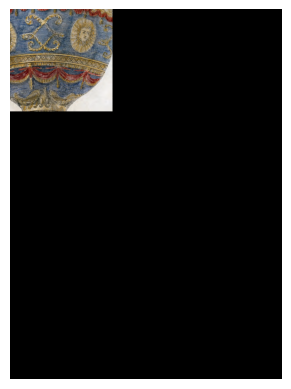

In [ ]:
arr = decode('part.jp2',)
print(arr.shape, arr.dtype)
plt.imshow(arr); plt.axis('off');
plt.show()

In [ ]:
printCodeInterval(ncode, 2900, 512) #  SOC:79, SIZ:81, COD:82, QCD:92, SOT:144, SOP:145

 62  10  60  63 120 112  97  99 107 101 116  32 101 110 100  61  39 119  39  63  62   0   0   0   0 106 112  50  99 255  79 255  81   0  47   0   0   0   0   4 
  0   0   0   4   0   0   0   0   0   0   0   0   0   0   0   4   0   0   0   4   0   0   0   0   0   0   0   0   0   0   3   7   1   1   7   1   1   7   1   1 
255  82   0  18   7   2   0   6   1   5   4   4  32   0 119 119 119 119 136 136 255  92   0  35  66 111  24 110 234 110 234 110 188 103   0 103   0 102 226  95 
 76  95  76  95 100  72   3  72   3  72  69  79 210  79 210  79  97 255 100   0  17   0   1  74 112 121 108 121 122 101 114  32 100 101 109 111 255 144   0  10 
  0   0   0   2  34 246   0   1 255 147 255 145   0   4   0   0 199 197 212  16 255 146  18  35 163  61 225 110 113 226 232 155 151 205 249 103 199  92 247 192 
190  61   3 103  69  72  11  11 150 109 205 216  99  61  19 217 175 134 211 173 150  82 142 247  37 203   2 127 181  36  40 196  72  66 109  93 177  83  36 109 
158 134 178  67 169 211 173 117 16

# __JPEG2000 acceso por resolución y calidad__

In [ ]:
# MAIN HEADER
# marker SIZ
    xsiz  = int4(code, j+4)    # xsiz:  image width
    ysiz  = int4(code, j+8)    # ysiz:  image height
    xTsiz = int4(code, j+20)   # xTsiz: image tile width
    yTsiz = int4(code, j+24)   # yTsiz: image tile height
    csiz  = int2(code, j+36)   # csiz:  number of components
# marker COD
    lcod  = int2(code, j)      # lcod: segment size
    scod  = code[j+2]          # scod: code style defaults: flags for ROI and precinct matrix
    prog  = code[j+3]          # prog: progression order: 0:LRCP, 1:RLCP, 2:RPCL, 3:PCRL, 4:CPRL
    lays  = int2(code, j+4)    # lays: number of quality layers
    levs  = code[j+7]          # levs: Number of decomposition levels, resolutions
    cbwd  = code[j+8]          # code block width dimensions in log2 factor   REVISAR
    cbht  = code[j+9]          # code block height dimensions in log2 factor   REVISAR
    for i in range(levs+1):
        precsz = code[j+12+i]  # precinct size in log2 factor (byte per resolution)
# marker QCD
    lqcd  = int2(code, j)      # lcod: segment size
    sqcd  = code[j+2]          # sqcd: quantization style: bits{7-5} 0:exp, 1:scalar_derived, 2:scalar_expounded; and bits{4-0} step precision
    qcode = bytearray(code[j+3:j+lqcd])
# marker QCC
    lqcc  = int2(code, j)      # lqcc: segment size
    cqcc  = code[j+2]          # cqcc: number of component quantization
    sqcc  = code[j+3]          # sqcc: quantization style: bits{7-5} 0:exp, 1:scalar_derived, 2:scalar_expounded; and bits{4-0} step precision
    qcode = bytearray(code[j+4:j+lqcc])

# TILES CODIFICATION


El siguiente código lee la estructura de un archivo de imagen siguiendo el estándar jpeg2000. La variable main_header extrae codestream del main header del archivo. El objetivo es generar un programa para construir un nuevo archivo jpeg2000 válido, en el cual, se pone información de una región de la imagen a una resolución y capas de calidad seleccionadas. Para esto, el nuevo archivo reutiliza el main header y lo adapta a la información seleccionada. Se debe modificar el tamaño de la imagen, el orden de progresión, el número de capas de calidad, el número de resoluciones, los descriptores del tamño de los precintos y ajustar los marcadores QCD y QCC a la cantidad de resoluciones.

In [ ]:
def int4(code, i):
    return code[i]*2**24 + code[i+1]*2**16 + code[i+2]*2**8 + code[i+3]

def int2(code, i):
    return code[i]*2**8 + code[i+1]

def wint2(arr, position, number):
    arr[position] = (number >> 8) & 0xFF
    arr[position + 1] = number & 0xFF

def wint4(arr, position, number):
    arr[position + 0] = (number >> 24) & 0xFF
    arr[position + 1] = (number >> 16) & 0xFF
    arr[position + 2] = (number >> 8)  & 0xFF
    arr[position + 3] = number & 0xFF

SOC =  79;   SIZ =  81;   COD =  82;   QCD =  92;   QCC =  93;
COC =  83;   RGN =  94;   POC =  95;   CRG =  99;   COM = 100;
TLM =  85;   PLM =  87;   PLT =  88;   PPM =  96;   PPT =  97;
SOT = 144;   SOP = 145;   EPH = 146;   SOD = 147;   EOC = 217;

progression = {0:'LRCP', 1:'RLCP', 2:'RPCL', 3:'PCRL', 4:'CPRL'}
qstyle      = {0:'exp', 1:'scalar_derived', 2:'scalar_expounded'}

marks = [SOC, SIZ, COD, QCD, QCC, COC, RGN, POC, CRG, COM, TLM, PLM, PLT, PPM, PPT, SOT, SOP, EPH, SOD, EOC]

filename = input('Ingrese el nombre del archivo jp2: ')

imfile   = open(filename, 'rb')
code     = imfile.read(10000)
imfile.close()

# parse SIZ segment   0x51   d_81
def parseSizeJP2K(code, j):
    lsiz  = int2(code, j+0)    # lsiz: size segment
    rsiz  = int2(code, j+2)    # rsiz: segment capabilities (0 usualy)
    xsiz  = int4(code, j+4)    # xsiz: image width
    ysiz  = int4(code, j+8)    # ysiz: image height
    x0siz = int4(code, j+12)   # xsiz: image horizontal origin
    y0siz = int4(code, j+16)   # ysiz: image vertical origin
    xTsiz = int4(code, j+20)   # xsiz: image tile width
    yTsiz = int4(code, j+24)   # ysiz: image tile height
    xosiz = int4(code, j+28)   # xsiz: image horizontal offset
    yosiz = int4(code, j+32)   # ysiz: image vertical offset
    csiz  = int2(code, j+36)   # csiz: number of components
    ntiles = ((xsiz - xosiz + xTsiz - 1) // xTsiz) * ((ysiz - yosiz + yTsiz - 1) // yTsiz)
    print('[%6d]'%j, 'SIZ')
    print(f'\t  segment_length:    {lsiz}')
    print(f'\t  image dimensions:  {xsiz}x{ysiz}')
    print(f'\t  Tile dimensions:   {xTsiz}x{yTsiz}')
    print(f'\t  Offset image:      {xosiz}x{yosiz}')
    print(f'\t  num of components: {csiz}')
    print(f'\t  num of Tiles:      {ntiles}')
    return lsiz, xTsiz, yTsiz

# parse COD segment  0x52   d_82
def parseCodeJP2K(code, xt, yt, j):
    lcod  = int2(code, j)      # lcod: segment size
    scod  = code[j+2]          # scod: code style defaults: flags for ROI and precinct matrix
    prog  = code[j+3]          # prog: progression order: 0:LRCP, 1:RLCP, 2:RPCL, 3:PCRL, 4:CPRL
    lays  = int2(code, j+4)    # lays: number of quality layers
    mctb  = code[j+6]          # mctb: multiple component trasnformation byte:  RGB to YCbCr
    levs  = code[j+7]          # levs: Number of decomposition levels, resolutions
    cbwd  = code[j+8]          # code block width dimensions in log2 factor
    cbht  = code[j+9]          # code block height dimensions in log2 factor
    cbs   = code[j+10]         # code block style parameters
    wavl  = code[j+11]         # wavelet trasnfomation type:  0:9-7, 32:5-3
    cur   = levs
    res_info = []
    for i in range(levs+1):
        precsz = code[j+12+i]  # precinct size in log2 factor
        resW   = int(xt / (2**cur))
        resH   = int(yt / (2**cur))
        precW  = 2**(precsz & 15)
        precH  = 2**((precsz & 240) >> 4)
        nPrecX = resW // precW if resW // precW >= 1 else 1
        nPrecY = resH // precH if resH // precH >= 1 else 1
        res_info.append([precsz, resH, resW, precH, precW, nPrecX, nPrecY])
        cur -= 1
    print('[%6d]'%j, 'COD')
    print(f'\t  segment length:    {lcod}')
    print(f'\t  style code:        {scod}')
    print(f'\t  progression:       {prog}:{progression[prog]}')
    print(f'\t  num of layers:     {lays}')
    print(f'\t  num of resolutions:{levs}')
    for pr in res_info:
        print('\t\t Code prec:', format(pr[0], '02X'), '  \tres:', '%4d'%pr[1], '%4d'%pr[2], ' \tsize:', '%4d'%pr[3], '%4d'%pr[4], '\tnprec:', '%2d'%pr[5], '%2d'%pr[6])
    print(f'\t  code_block_size:   {2**cbwd}x{2**cbht}')
    print(f'\t  wavelet_type:      {wavl}')
    print(f'\t  color_transform:   {mctb}')
    return lcod

# parse QCD segment  0x5C   d_92
def parseQcdJP2K(code, res, j):
    lqcd  = int2(code, j)      # lcod: segment size
    sqcd  = code[j+2]          # sqcd: quantization style: bits{7-5} 0:exp, 1:scalar_derived, 2:scalar_expounded; and bits{4-0} step precision
    st    = (sqcd & 0xE0) >> 5
    prcs  = sqcd % 0x1F
    qcode = bytearray(code[j+3:j+lqcd])
    styl  = (sqcd & 0xE0) >> 5
    print('[%6d]'%j, 'QCD')
    print(f'\t  segment len:{lqcd}, quant style:{qstyle[st]}, precision:{prcs}')
    print('\t  code: ',  ' '.join(format(q, '02X') for q in qcode))
    return lqcd

# parse QCC segment  0x5D  d_93
def parseQccJP2K(code, res, j):
    lqcc  = int2(code, j)      # lqcc: segment size
    cqcc  = code[j+2]          # cqcc: number of component quantization
    sqcc  = code[j+3]          # sqcc: quantization style: bits{7-5} 0:exp, 1:scalar_derived, 2:scalar_expounded; and bits{4-0} step precision
    st    = (sqcc & 0xE0) >> 5
    prcs  = sqcc % 0x1F
    qcode = bytearray(code[j+4:j+lqcc])
    print('[%6d]'%j, 'QCC')
    print(f'\t  segment len:{lqcc}, component:{cqcc}, quant_style:{qstyle[st]}, precision:{prcs}')
    print('\t  code: ',  ' '.join(format(q, '02X') for q in qcode))
    return lqcc

# parse SOT segment  0x90  d_144
def parseSotJP2K(code, j):
    lsot  = int2(code, j)      # lsot: segment size
    isot  = int2(code, j+2)    # isot: tile index number
    psot  = int4(code, j+4)    # psot: total tile length
    tpsot = code[j+8]          # tpsot: index of first tile part
    ntsot = code[j+9]          # ntsot: number of tile parts

    print('[%6d]'%j, f'SOT len:{lsot}, ndx:{isot}, Total_Tile_length:', '{:,}'.format(psot))
    #for i in range(j+10, j+psot):
    #    if code[i] == 0xFF and code[i+1] in marks[10:15]:
    #        print(i,'\t', ' '.join(format(q, '02X') for q in code[i:i+30]))

    return lsot

# parse SOT segment  0x90  d_144
def parseSotAllJP2K(code, j):
    while j < len(code):
        if code[j-2] == 0xFF and code[j-1] == SOT:    ## SOT: Tile segment
            lsot  = int2(code, j)                     # lsot: segment size
            isot  = int2(code, j+2)                   # isot: tile index number
            psot  = int4(code, j+4)                   # psot: total tile length
            tpsot = code[j+8]                         # tpsot: index of first tile part
            ntsot = code[j+9]                         # ntsot: number of tile parts
            if j>100000000 and isot<120:
                print('[%6d]'%j, f'SOT len:{lsot}, ndx:{isot}, \tTotal_Tile_length:', '{:,}'.format(psot))
            aSot.append(j)
            j = j + lsot
        else:
            j = j + 1
    return len(aSot)

def countSopSegments(code, j):
    sop_cnt = 0
    while j < len(code):
        if code[j] == 0xFF and code[j+1] == SOP:    ## SOP: Code block segment
            nsop = int2(code, j+4)
            if sop_cnt != nsop: print('problem SOP count', nsop, sop_cnt)
            sop_cnt += 1
        if code[j] == 0xFF and (code[j+1] == SOT or code[j+1] == EOC): break
        j = j +1
    print('Pakets count =', sop_cnt)

# Documentation in: https://www.sciencedirect.com/topics/computer-science/jpeg2000
# parse TLM segment (tile part length in the main header) 0x55  d_85
def parseTlmJP2K(code, j):
    ltlm  = int2(code, j+0)    # ltlm: size segment
    ztlm  = code[j+2]          # ztlm: index relative to other TLM marker segments in the header
    stlm  = code[j+3]          # stlm: size of ttlm and ptlm parameters
    lim   = j+ltlm
    print('[%6d]'%j, f'TLM\n\t  segment len:{ltlm}, ndx:{ztlm}, size reg:{stlm} end pointer: {lim}')
    pntr  = lim
    while j < lim:
        if stlm == 0x60:
            ttlm  = int2(code, j+4)   # ttlm: tile number of i-th tile part
            ptlm  = int4(code, j+6)   # ptlm: length in bytes from beginning of SOT marker to end of data for the i-th tile-part
            if ttlm >540 and ttlm<550: print(f'\t\t  {j}\tTile N°: {ttlm}\tlength: {ptlm}, pos: {pntr}\t', ' '.join(format(q, '02X') for q in code[pntr:pntr+24]))
            ncode = bytearray(code[pntr:(pntr+ptlm+2)])
            f2 = open('tiles_cut/t%04d.dat'%ttlm, 'wb')
            f2.write(ncode)
            f2.close()
            pntr += ptlm
            j += 6
    return ltlm

# parse PLM segment (packet length in main header) 0x57 d_87
def parsePlmJP2K(code, j):
    lplm  = int2(code, j+0)    # lplm: size segment
    zplm  = code[j+2]          # zplm: index relative to other PLM marker segments in the header
    nplm  = code[j+3]          # nplm: number of bytes of iplm information for i-th tile part
    iplm  = code[j+4]          # iplm: length the j-th packet in the i-th tile part

# parse PLT segment (packet length in tile header) 0x58  d_88
def parsePltJP2K(code, j):
    lplt  = int2(code, j+0)    # lplt: size segment
    zplt  = code[j+2]          # zplt: index relative to other PLT marker segments in the header
    iplt  = code[j+4]          # iplt: length the i-th packet

# parse PPM segment (packet header in main header) 0x60  d_96
def parsePpmJP2K(code, j):
    lppm  = int2(code, j+0)    # lppm: size segment
    zppm  = code[j+2]          # zppm: index relative to other PPM marker segments in the header
    nppm  = int4(code, j+3)    # nppm: number of bytes of ippm information for i-th tile part, one value for each tile part
    ippm  = code[j+7]          # ippm: Packet header for every packet in order in the tile-part. The component number, layer and resolution determined from method of progression or POD. One value for each packet in the tile-part

# parse PPT segment  (packet header in tile part) 0x61  d_97
def parsePptJP2K(code, j):
    lppt  = int2(code, j+0)    # lppt: size segment
    zppt  = code[j+2]          # zppt: index relative to other PPM marker segments in the header
    ippt  = code[j+3]          # ippt: Packet header for every packet in order in the tile-part. The component number, layer and resolution determined from method of progression or POD. One value for each packet in the tile-part


# parse COM segment 0x64  d_100
def parseComJP2K(code, j):
    lcom  = int2(code, j)      # lcom: segment size
    rcom  = int2(code, j+2)    # rcom: type of comment 0:general use,  1:binary data
    cad = code[j+4:j+lcom]
    print('[%6d]'%j, f'COM len:{lcom}, type:{rcom}, \ttext:"{cad.decode("utf-8")}"')
    return lcom

def textcode(code, ini, end):
    for i in range(ini, end):
        if code[i] > 31 and code[i] < 129:
            print(chr(code[i]), end='')
        elif code[i] == 10: print()
        elif code[i] ==  9: print('\t', end='')
        elif code[i] <  32: pass
        else: print('!%d'%code[i], end='')
    print()

# parse JP2K image file
j = 0
aSot = []
while j < len(code):
    if code[j] == 0xFF and code[j+1] == SOC:    ##  start codestream
        print('[%6d]'%j, 'SOC')
        init = j
        j += 1
    elif code[j] == 0xFF and code[j+1] == SIZ:  ##  size params
        k, xt, yt =  parseSizeJP2K(code, j+2)
        j += k+1
    elif code[j] == 0xFF and code[j+1] == COD:  ##  code params
        j += parseCodeJP2K(code, xt, yt, j+2) + 1
    elif code[j] == 0xFF and code[j+1] == QCD:  ##  quantization params
        j += parseQcdJP2K(code, 4, j+2) + 1
        ended = j
    elif code[j] == 0xFF and code[j+1] == QCC:  ##  component quantization params
        j += parseQccJP2K(code, 4, j+2) + 1
        ended = j
    elif code[j] == 0xFF and code[j+1] == COM:  ##  Comment segment
        j += parseComJP2K(code, j+2) + 1
    elif code[j] == 0xFF and code[j+1] == TLM:  ##  Tile-part lenght in main header
        j += parseTlmJP2K(code, j+2) + 1
    elif code[j] == 0xFF and code[j+1] == SOT:  ##  Tile segment start
        print('---Tile segments---')
        parseSotJP2K(code, j+2)
        break
    j += 1

print(len(aSot), aSot)
print('Main header:', init, ended)
main_header = bytearray(code[init:ended])

In [ ]:
# Cambios:
def get_mainheader_code(start, size): pass
def change_imagesize(xsiz, ysiz): pass
def change_tilesize(tx, ty): pass
def change_progression(prog): pass
def change_numlayers(lays): pass
def change_numlevs(levs): pass # new levs, select precinct size, select QCD y QCC


In [ ]:
def int_to_bytes_array(num):
    return num.to_bytes(4, byteorder='big')

#ncode = bytearray(code[:70219])
ncode = bytearray(code[:70138])
ncode[-1] = 217

# for j in range(len(ncode)):
#     if ncode[j] == 0xFF and ncode[j+1] == SIZ:
#         print('pos',j)
#         width = int_to_bytes_array(1024)
#         height = int_to_bytes_array(1024)

#         for i in range(4):
#             ncode[j+6+i] = width[i]
#         for i in range(4):
#             ncode[j+10+i] = height[i]
#         break

f2 = open('part.jp2', 'wb')
f2.write(ncode)
f2.close()

In [ ]:
arr = decode('part.jp2',)
print(arr.shape, arr.dtype)
plt.imshow(arr); plt.axis('off');
plt.show()

RuntimeError: Error decoding the J2K data: failed to read the header

In [ ]:
printCodeInterval(ncode, len(ncode)-5, 5) #  SOC:79, SIZ:81, COD:82

  0 255 146 255 217 

In [ ]:
# 3056, 205411, 261459, 401481
ncode = bytearray(code[:3056] +  code[261459:401483])
ncode[-1] = 217

f2 = open('part.jp2', 'wb')
f2.write(ncode)
f2.close()

## Generate jpeg2000 file for slelected region (coords, resol, quality)

In [ ]:
import io

def char_to_bytes_array(value):
    return bytearray([(value >> 8) & 0xFF, value & 0xFF])

def int_to_bytes_array(value):
    return bytearray([(value >> 24) & 0xFF, (value >> 16) & 0xFF, (value >> 8) & 0xFF, value & 0xFF])

def get_tile_code(index, pack_len):
    baos = io.BytesIO()
    psot = pack_len + 2 + 12

    baos.write(char_to_bytes_array(0xFF90))
    baos.write(char_to_bytes_array(0xA))
    baos.write(char_to_bytes_array(index))
    baos.write(int_to_bytes_array(psot))

    baos.write(0)
    baos.write(1)
    baos.write(char_to_bytes_array(0xFF93))

    return baos.getvalue()

def generate(lst, w, h, header, packs, l, maxr, r):
    cdst = io.BytesIO()
    tmp = io.BytesIO()
    nhd = transcode_header(header, w, h, l, maxr, r)
    data_bytes = bytearray()
    size = len(packs)

    cdst.write(nhd)
    for i in range(size):
        p = lst[packs[i]]
        tmp.write(p.get_bytes())

    data_bytes = tmp.getvalue()
    cdst.write(get_tile_code(0, len(data_bytes)))
    cdst.write(data_bytes)
    cdst.write(char_to_bytes_array(0xFFD9))

    return cdst.getvalue()

def transcode_header(header, w, h, l, maxr, r):
    def int_to_bytes_array(num):
        return num.to_bytes(4, byteorder='big')

    width = int_to_bytes_array(w)
    height = int_to_bytes_array(h)

    for i in range(8, 12):
        header[i] = width[i - 8]

    for i in range(12, 16):
        header[i] = height[i - 12]

    for i in range(len(header)):
        if header[i] == -1 and header[i + 1] == 0x52:
            header[i + 6] = (l + 1) >> 8
            header[i + 7] = (l + 1)
            break

    if maxr != r:
        aux, sb, i, j, numQCC = 0, 0, 0, 0, 0
        nhd = []

        numQCC = calc_num_QCC(header)

        nhd = [0] * (len(header) - ((3 * numQCC + 4) * (maxr - r)))
        sb = 3 * r + 1

        while i < len(header):
            nhd[j] = header[i]

            if header[i] == -1:
                i += 1
                j += 1
                nhd[j] = header[i]

                if header[i] == 0x52:
                    aux = 13 + r
                    nhd[j + 1] = aux >> 8
                    nhd[j + 2] = aux
                    nhd[j + 3] = header[i + 3]
                    nhd[j + 4] = header[i + 4]
                    nhd[j + 5] = header[i + 5]
                    nhd[j + 6] = header[i + 6]
                    nhd[j + 7] = header[i + 7]
                    nhd[j + 8] = r
                    nhd[j + 9] = header[i + 9]
                    nhd[j + 10] = header[i + 10]
                    nhd[j + 11] = header[i + 11]
                    nhd[j + 12] = header[i + 12

                    for k in range(13, r + 13):
                        nhd[j + k] = header[i + k]

                    j += 13 + r
                    i += 13 + maxr

                elif header[i] == 0x5C:
                    aux = 4 + 3 * r
                    nhd[j + 1] = aux >> 8
                    nhd[j + 2] = aux
                    nhd[j + 3] = header[i + 3]

                    for k in range(4, sb + 4):
                        nhd[j + k] = header[i + k]

                    j += 4 + 3 * r
                    i += 4 + 3 * maxr

                elif header[i] == 0x5D:
                    aux = 5 + 3 * r
                    nhd[j + 1] = aux >> 8
                    nhd[j + 2] = aux
                    nhd[j + 3] = header[i + 3]
                    nhd[j + 4] = header[i + 4]

                    for k in range(5, sb + 5):
                        nhd[j + k] = header[i + k]

                    j += 5 + 3 * r
                    i += 5 + 3 * maxr

            i += 1
            j += 1

        return nhd

    return header

def calc_num_qcc(hd):
    num_qcc = 0
    k = 0
    while k < len(hd):
        if hd[k] == -1 and hd[k + 1] == 0x5D:
            num_qcc += 1
            k += 1
        k += 1

    return num_qcc

def char_to_bytes_array(value):
    return bytearray([(value >> 8) & 0xFF, value & 0xFF])

def int_to_bytes_array(value):
    return bytearray([(value >> 24) & 0xFF, (value >> 16) & 0xFF, (value >> 8) & 0xFF, value & 0xFF])

## Select packets

In [ ]:
def calculate_packets_for_request(coordinates, tiles, layers, resolutions, components):
    prec_roi = [PrecROI() for _ in range(resolutions + 1)]
    c1 = tiles == ALL if True else False
    c2 = layers == ALL if True else False
    c3 = resolutions == ALL if True else False
    c4 = components == ALL if True else False
    dx, num_prec_x = 0, 0
    missing = []
    packs = []

    for i in range(len(prec_roi)):
        prec_roi[i] = PrecROI()

    if (coordinates[0] > 0) or (coordinates[1] > 0) or (coordinates[2] > 0) or (coordinates[3] > 0):
        coord_to_prec(coordinates, prec_roi, resolutions)

    num = 0
    num_tiles = img_info.tx * img_info.ty
    num_res = img_info.num_lev + 1
    lgral, cgral, start_line = 0, 0, 0

    for t in range(num_tiles):
        for l in range(img_info.num_lay):
            for r in range(num_res):
                for c in range(img_info.num_cmp):
                    num_prec = img_info.num_prec_x[r] * img_info.num_prec_y[r]
                    for p in range(num_prec):
                        if (t <= tiles or c1) and (l <= layers or c2) and (r <= resolutions or c3) and (c <= components or c4):
                            lgral = (t // img_info.tx) * img_info.num_prec_x[r] + p // img_info.num_prec_x[r]
                            cgral = (t % img_info.tx) * img_info.num_prec_x[r] + p % img_info.num_prec_x[r]
                            pg = img_info.num_prec_x[r] * img_info.tx * lgral + cgral
                            if pg >= prec_roi[r].tl and pg <= prec_roi[r].br:
                                num_prec_x = img_info.num_prec_x[r] * img_info.tx
                                dx = prec_roi[r].tr - prec_roi[r].tl
                                start_line = prec_roi[r].tl + int((pg - prec_roi[r].tl) / num_prec_x) * num_prec_x
                                if pg >= start_line and pg <= start_line + dx:
                                    packs.append(num)
                                    if lst_packs[num] == None:
                                        missing.append(num)
                        num += 1

    mpacks = [0] * len(missing)
    for i in range(len(mpacks)):
        mpacks[i] = missing[i]


## Generate package index file

In [ ]:
name = input('Ingrese el nombre de un archivo jp2: ')
if name=='': name = 'sample1.jp2'
imgfile = open(name, 'rb')
codfile = open('code.txt', 'w')
code = imgfile.read()

bw = open('out.idx', 'w')
print('byte stream size:', len(code))
packet_index = 0
tile_index = -1
lay, res, com, pos = 0,0,0,0
firsTile = True
firstSiz = True
firstCod = True
valPacket = False
precStr = ''
i=0
while i < len(code):
    if code[i] == 0xFF:
        i += 1
        if code[i] == 0x51: # SIZE
            if firstSiz:
                i+=5
                xs = bytes_to_int4(*code[i:i+4])
                ys = bytes_to_int4(*code[i+4:i+8])
                i+=16
                xt = bytes_to_int4(*code[i:i+4])
                yt = bytes_to_int4(*code[i+4:i+8])
                i+=8
                xt0 = bytes_to_int4(*code[i:i+4])
                yt0 = bytes_to_int4(*code[i+4:i+8])
                ncomp = bytes_to_int2(code[i+8], code[i+9])
                i+=10
                firstSiz = False
                ntiles = ((xs - xt0 + xt - 1) // xt) * ((ys - yt0 + yt - 1) // yt)
                print('SIZE:', xs, ys, ' \tTILE:', xt, yt, '\tOFFSET:', xt0, yt0, '\tNum Comp:',ncomp, '\tNum Tiles:', ntiles)
        elif code[i] == 0x52: # COD
            if firstCod:
                i+=4
                prog_order_id = code[i]
                nlayers = bytes_to_int2(code[i+1], code[i+2])
                i+=4
                nDecLevels = code[i]
                i+=5
                curDevLev = nDecLevels
                nprec_res = []
                for j in range(nDecLevels+1):
                    precSiz = code[i]
                    resH = int(yt / (2 ** curDevLev))
                    resW = int(xt / (2 ** curDevLev))
                    precW = 2 ** (precSiz & 15)
                    precH = 2 ** ((precSiz & 240) >> 4)
                    nPrecX = resW // precW if resW // precW >= 1 else 1
                    nPrecY = resH // precH if resH // precH >= 1 else 1
                    nprec_res.append(nPrecX * nPrecY)
                    precStr += f'{nPrecX} {nPrecY}'
                    if curDevLev != 0: precStr += ' '
                    curDevLev -= 1
                    print('\tPrecints:', precSiz, '\tres: ', resH, resW, '\tprec:', precH, precW, '\tnprec:', nPrecX, nPrecY)
                    i+=1
                print('CODE: progression order:', prog_order_id, '\tNum layers:', nlayers, '\tNum Levels:', nDecLevels) #0=LRCP, 1=RLCP, 2=RPCL, 3=PCRL, 4=CPRL
                firstCod = False
        elif code[i] == 0x90:   # SOT
            if tile_index < ntiles - 1:
                tile_index += 1
                if firsTile:
                    main_head_endpos = i-2
                    imageBox = f'{xs} {ys}\n{prog_order_id}\n{xt} {yt}\n{ncomp}\n{nlayers}\n{nDecLevels}\n{precStr}\n{main_head_endpos}\n{len(code)}\n\n'
                    bw.write(imageBox)
                    firsTile = False
                if valPacket:
                    bw.write(f'{i-2}\n')
                    valPacket = False
            print(i, f'\tSOT\tEnd pos:', main_head_endpos)
        elif code[i] == 0x91:   # SOP
            if valPacket:
                bw.write(f'{i-2}\n')
                valPacket = False
                if 8 < i-2-prev < 20:
                    codfile.write(f'{i-2-prev} ')
                    for k in range(i-prev+1): codfile.write(f'{code[prev+k]} ')
                    codfile.write('\n')
            valPacket = True
            bw.write(f'{packet_index} {tile_index} {lay} {res} {com} {pos} {i-1} ')
            prev = i-1
            if pos+1 < nprec_res[res]:
                pos+=1
            else:
                pos = 0
                if com+1 < ncomp:
                    com+=1
                else:
                    com = 0
                    if res+1 < nDecLevels+1:
                        res+=1
                    else:
                        res = 0
                        if lay+1 < nlayers:
                            lay+=1
                        else:
                            lay = 0
            i+=3
            packet_index += 1
            #print(i, format(code[i], '02x'), 'SOP')
        elif code[i] == 0xD9:
            bw.write(str(i-2))
            print(i, format(code[i], '02x'), 'EOC')
    i = i+1
bw.close()

Ingrese el nombre de un archivo jp2: sample1.jp2
byte stream size: 670265
SIZE: 2717 3701  	TILE: 1024 1024 	OFFSET: 0 0 	Num Comp: 3 	Num Tiles: 12
	Precints: 119 	res:  32 32 	prec: 128 128 	nprec: 1 1
	Precints: 119 	res:  64 64 	prec: 128 128 	nprec: 1 1
	Precints: 119 	res:  128 128 	prec: 128 128 	nprec: 1 1
	Precints: 119 	res:  256 256 	prec: 128 128 	nprec: 2 2
	Precints: 136 	res:  512 512 	prec: 256 256 	nprec: 2 2
	Precints: 136 	res:  1024 1024 	prec: 256 256 	nprec: 4 4
CODE: progression order: 2 	Num layers: 6 	Num Levels: 5
3057 	SOT	End pos: 3055
70218 	SOT	End pos: 3055
169282 	SOT	End pos: 3055
205412 	SOT	End pos: 3055
261460 	SOT	End pos: 3055
401482 	SOT	End pos: 3055
425490 	SOT	End pos: 3055
472181 	SOT	End pos: 3055
534852 	SOT	End pos: 3055
561158 	SOT	End pos: 3055
606772 	SOT	End pos: 3055
645200 	SOT	End pos: 3055
670264 d9 EOC


In [ ]:
import pandas as pd
dfj = pd.read_excel('jp2codes.xlsx', sheet_name='pkts')
dfj[~dfj.resol.isna()].groupby(['prec'])['prec'].count()
# 12 T, 6 Q, 5 R, 3 C, 4x4
# 27PR, 3C, 6Q, 12T = 5832
# (27x6 + 23x5 + 20x1)PRT, 3C, 6Q = 5346

prec
0.0     1188
1.0      594
2.0      594
3.0      594
4.0      198
5.0      198
6.0      198
7.0      198
8.0      198
9.0      198
10.0     198
11.0     198
12.0     198
13.0     198
14.0     198
15.0     198
Name: prec, dtype: int64

# Problemas Implementación actual


> * Se asume que la organización de los paquetes es: Calidad -  Resolución - Componente y Precinto (filas y columnas), no soporta otras progresiones
* Carga en memoria toda la imagen
* Con la solicitud manda a decodificar Tiles completos y luego recorta
* Carga todas las capas de calidad y todas las resoluciones
* Solo funciona en dimensiones potencia de 2

<font size=5>code </font> | <font size=5>progression </font>
:--: | :--:
<font size=4>0 </font> | <font size=4>LRCP </font>
<font size=4>1 </font> | <font size=4>RLCP </font>
<font size=4>2 </font> | <font size=4>RPCL </font>
<font size=4>3 </font> | <font size=4>PCRL </font>
<font size=4>4 </font> | <font size=4>CPRL </font>



In [ ]:
x1 = 800
y1 = 1000
w  = 600
h  = 600
r  = 3
l  = 3
pkts = []


In [ ]:
cont = 0
tiles = 1
qualy = 1
resol = 6
comp  = 3
sizet = 1024
precx = [1, 1, 1, 2, 2, 4]
precy = [1, 1, 1, 2, 2, 4]
posx = 0
posy = 0
f2 = open('sec.txt','w')
for t in range(tiles):
    for q in range(qualy):
        for r in range(resol):
            for c in range(comp):
                for px in range(precx[r]):
                    for py in range(precy[r]):
                        print(f'{cont} {t} {q} {r} {c} {px},{py}')
                        cont+=1
f2.close()

In [ ]:
# manejo de tiles
xs = 2717
ys = 3701
xt = 1024
yt = 1024
ct = 0
posx = 0
posy = 0
while True:
    print(ct, posx, posy)
    if posx + xt < xs:
        posx += xt
    elif posy + yt < ys:
        posy += yt
        posx = 0
    else : break;
    ct += 1


0 0 0
1 1024 0
2 2048 0
3 0 1024
4 1024 1024
5 2048 1024
6 0 2048
7 1024 2048
8 2048 2048
9 0 3072
10 1024 3072
11 2048 3072


In [ ]:
import openjpeg as jp
print(jp.get_parameters('sample1.jp2'))
print(jp.debug_logger())

{'rows': 3701, 'columns': 2717, 'colourspace': 'unspecified', 'samples_per_pixel': 3, 'precision': 8, 'is_signed': False, 'nr_tiles': 0}
None


In [ ]:
import ctypes

# Ruta al archivo JPEG2000
archivo_jpeg2000 = '/ruta/a/tu/archivo/jpeg2000.jp2'  # Cambia la ruta según el archivo que quieras leer

# Cargar la biblioteca OpenJPEG
openjpeg_path = '/ruta/a/tu/biblioteca/libopenjp2.so'  # Cambia la ruta según tu instalación de OpenJPEG
openjpeg = ctypes.CDLL(openjpeg_path)

# Definir la función para leer el encabezado del archivo JPEG2000
def leer_encabezado_jpeg2000(archivo):
    # Abrir el archivo JPEG2000 en modo binario
    archivo = open(archivo, 'rb')
    archivo_bytes = archivo.read()
    archivo.close()

    # Crear una estructura para almacenar la información del archivo
    class opj_dinfo(ctypes.Structure):
        pass

    # Cargar las funciones necesarias de OpenJPEG
    openjpeg.opj_create_decompress.argtypes = []
    openjpeg.opj_create_decompress.restype = ctypes.POINTER(opj_dinfo)
    openjpeg.opj_destroy_decompress.argtypes = [ctypes.POINTER(opj_dinfo)]
    openjpeg.opj_destroy_decompress.restype = None
    openjpeg.opj_decode.argtypes = [ctypes.POINTER(opj_dinfo), ctypes.c_void_p, ctypes.c_uint32, ctypes.c_void_p]
    openjpeg.opj_decode.restype = ctypes.c_int

    # Crear el descompresor JPEG2000
    descompresor = openjpeg.opj_create_decompress()

    # Decodificar solo el encabezado del archivo JPEG2000
    openjpeg.opj_decode(descompresor, archivo_bytes, len(archivo_bytes), None)

    # Obtener la información del encabezado
    width = ctypes.c_int()
    height = ctypes.c_int()
    num_components = ctypes.c_int()
    num_resolution = ctypes.c_int()
    openjpeg.opj_get_image_info(descompresor, ctypes.byref(width), ctypes.byref(height), ctypes.byref(num_components), ctypes.byref(num_resolution))

    # Destruir el descompresor
    openjpeg.opj_destroy_decompress(descompresor)

    # Devolver la información del encabezado
    return width.value, height.value, num_components.value, num_resolution.value

# Leer el encabezado del archivo JPEG2000
ancho, alto, num_componentes, num_resoluciones = leer_encabezado_jpeg2000(archivo_jpeg2000)

# Mostrar la información del encabezado
print("Ancho:", ancho)
print("Alto:", alto)
print("Número de componentes:", num_componentes)
print("Número de resoluciones:", num_resoluciones)


In [ ]:
# pintar la imagen y pintar objetos gráficos
import plotly.graph_objects as go
import numpy as np
from PIL import Image

# Crear la figura
fig = go.Figure()

# Dibujar una elipse
fig.add_shape(type="circle",
              xref="x", yref="y",
              x0=200, y0=200,
              x1=400, y1=400,
              line=dict(color="RoyalBlue"),
              fillcolor="LightSkyBlue",
              opacity=0.5,
              layer="below")

# Dibujar un polígono
fig.add_trace(go.Scatter(x=[100, 300, 500, 100],
                         y=[100, 200, 100, 100],
                         mode="lines",
                         fill="toself",
                         fillcolor="rgba(255, 182, 193, 0.6)",
                         line=dict(color="rgb(255, 182, 193)"),
                         opacity=0.5))

# Cargar la imagen
img = Image.open("imagen.jpg")
img_array = np.array(img)

# Añadir la imagen
fig.add_trace(go.Image(z=img_array, x0=500, y0=500))

# Actualizar diseño de la figura
fig.update_layout(
    title_text="Lienzo con objetos gráficos y imagen",
    xaxis=dict(
        #visible=False,
        range=[0, img_array.shape[1]*4]
    ),
    yaxis=dict(
        #visible=False,
        range=[0, img_array.shape[0]*2],
        scaleanchor="x"
    )
)

# Mostrar la figura
fig.show()


In [ ]:
LRCP = 0
RLCP = 1
RPCL = 2
PCRL = 3
CPRL = 4


In [ ]:
# prompt: puedes escribir un ejemplo sencillo para convertir de un esquema de organización de paquetes LRCP a RPCL, primero genera una estructura que almacena la posición en el codestream de los paquetes de un tile y luego genera la conversión al otro esquema

class PacketInfo:
    def __init__(self, tile_index, layer, resolution, component, precinct_x, precinct_y, codestream_pos):
        self.tile_index = tile_index
        self.layer = layer
        self.resolution = resolution
        self.component = component
        self.precinct_x = precinct_x
        self.precinct_y = precinct_y
        self.codestream_pos = codestream_pos


def lrcp_to_rpcl(packet_info_list):
    """
    Converts a list of PacketInfo objects from LRCP to RPCL order.

    Args:
        packet_info_list: A list of PacketInfo objects representing the codestream in LRCP order.

    Returns:
        A new list of PacketInfo objects representing the codestream in RPCL order.
    """

    rpcl_packet_info_list = sorted(packet_info_list, key=lambda x: (x.resolution, x.precinct_x, x.precinct_y, x.component, x.layer))

    return rpcl_packet_info_list

# Example usage
packet_info_list = [
    PacketInfo(0, 0, 0, 0, 0, 0, 100),
    PacketInfo(0, 0, 0, 1, 0, 0, 110),
    PacketInfo(0, 0, 1, 0, 0, 0, 120),
    PacketInfo(0, 0, 1, 1, 0, 0, 130),
    PacketInfo(0, 1, 0, 0, 0, 0, 140),
    PacketInfo(0, 1, 0, 1, 0, 0, 150),
]

rpcl_packet_info_list = lrcp_to_rpcl(packet_info_list)

print("Original LRCP packet order:")
for packet_info in packet_info_list:
    print(f"Tile: {packet_info.tile_index}, Layer: {packet_info.layer}, Resolution: {packet_info.resolution}, Component: {packet_info.component}, Precinct: ({packet_info.precinct_x}, {packet_info.precinct_y}), Position: {packet_info.codestream_pos}")

print("\nConverted RPCL packet order:")
for packet_info in rpcl_packet_info_list:
    print(f"Tile: {packet_info.tile_index}, Layer: {packet_info.layer}, Resolution: {packet_info.resolution}, Component: {packet_info.component}, Precinct: ({packet_info.precinct_x}, {packet_info.precinct_y}), Position: {packet_info.codestream_pos}")


Original LRCP packet order:
Tile: 0, Layer: 0, Resolution: 0, Component: 0, Precinct: (0, 0), Position: 100
Tile: 0, Layer: 0, Resolution: 0, Component: 1, Precinct: (0, 0), Position: 110
Tile: 0, Layer: 0, Resolution: 1, Component: 0, Precinct: (0, 0), Position: 120
Tile: 0, Layer: 0, Resolution: 1, Component: 1, Precinct: (0, 0), Position: 130
Tile: 0, Layer: 1, Resolution: 0, Component: 0, Precinct: (0, 0), Position: 140
Tile: 0, Layer: 1, Resolution: 0, Component: 1, Precinct: (0, 0), Position: 150

Converted RPCL packet order:
Tile: 0, Layer: 0, Resolution: 0, Component: 0, Precinct: (0, 0), Position: 100
Tile: 0, Layer: 1, Resolution: 0, Component: 0, Precinct: (0, 0), Position: 140
Tile: 0, Layer: 0, Resolution: 0, Component: 1, Precinct: (0, 0), Position: 110
Tile: 0, Layer: 1, Resolution: 0, Component: 1, Precinct: (0, 0), Position: 150
Tile: 0, Layer: 0, Resolution: 1, Component: 0, Precinct: (0, 0), Position: 120
Tile: 0, Layer: 0, Resolution: 1, Component: 1, Precinct: (0, 

## Pruebas: Laboratorios

In [ ]:
import numpy as np

# Factores de entrada: [Dinero, Opinión de la pareja, Clima]
X = np.array([[1, 1, 1], [1, 0, 1], [0, 1, 1], [0, 0, 0]])

# Pesos asociados a cada factor (importancia)
W = np.array([2, 1, 1])

# Sesgo
b = -2

# Función de activación (escalón)
def step_function(x):
    return 1 if x > 0 else 0

# Predicción del perceptrón
def perceptron_predict(X, W, b):
    return [step_function(np.dot(x, W) + b) for x in X]

# Prueba de predicción
predicciones = perceptron_predict(X, W, b)
for i, x in enumerate(X):
    print(f"Entrada: {x}, Predicción (¿Viajar?): {'Sí' if predicciones[i] == 1 else 'No'}")

Entrada: [1 1 1], Predicción (¿Viajar?): Sí
Entrada: [1 0 1], Predicción (¿Viajar?): Sí
Entrada: [0 1 1], Predicción (¿Viajar?): No
Entrada: [0 0 0], Predicción (¿Viajar?): No


In [ ]:
import numpy as np

# Datos de entrada (X1, X2) y etiquetas (Y)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 0, 0, 1])

# Pesos y sesgo
W = np.random.rand(2)
b = np.random.rand(1)

# Función de activación (escalón)
def step_function(x):
    return 1 if x > 0 else 0

# Predicción
def perceptron_predict(X, W, b):
    return step_function(np.dot(X, W) + b)

# Prueba de predicción
for x, y in zip(X, Y):
    print(f"Entrada: {x}, Predicción: {perceptron_predict(x, W, b)}, Real: {y}")

Entrada: [0 0], Predicción: 1, Real: 0
Entrada: [0 1], Predicción: 1, Real: 0
Entrada: [1 0], Predicción: 1, Real: 0
Entrada: [1 1], Predicción: 1, Real: 1
